In [23]:
import numpy as np
import matplotlib.pyplot as plt

def flipcoin(p, n):
    return np.random.choice([0, 1], size=n, p=[1-p, p])

def calc_max_likelihood_params(flips, number_params):
    samples = np.array_split(flips, number_params)
    return [np.mean(sample) for sample in samples]

def log_likelihood(d, p):
    return np.sum(np.log(np.where(d == 1, p, 1-p)))

def calc_log_likelihood(flips, params):
    samples = np.array_split(flips, len(params))
    log_likelihoods = [log_likelihood(sample, param) for sample, param in zip(samples, params)]
    return np.sum(log_likelihoods)

def calc_LR(d, ps1, ps2):
    l1 = calc_log_likelihood(d, ps1)
    l2 = calc_log_likelihood(d, ps2)
    lrt = -2 * (l1 - l2)
    return lrt, l1, l2

def calc_LRTs(flips, num_params_model_1, num_params_model_2):
    LRTs, L1s, L2s = [], [], []
    for f in flips:
        max_probs_model_1 = calc_max_likelihood_params(f, num_params_model_1)
        max_probs_model_2 = calc_max_likelihood_params(f, num_params_model_2)
        statistic, l1, l2 = calc_LR(f, max_probs_model_1, max_probs_model_2)
        LRTs.append(statistic)
        L1s.append(l1)
        L2s.append(l2)
    return LRTs, L1s, L2s

def plot_LRTs(LRTs):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(LRTs, bins=20, edgecolor='w')
    plt.title("The Likelihood Ratio Converges to the Chi-Square Distribution")
    plt.xlabel("Likelihood Ratio Test Statistic -2[log(LR)]")
    plt.ylabel("Frequency")

    from scipy.stats import gaussian_kde
    plt.subplot(1, 2, 2)
    density = gaussian_kde(LRTs)
    x = np.linspace(min(LRTs), max(LRTs), 100)
    plt.plot(x, density(x), color='steelblue')
    plt.title("The Likelihood Ratio Converges to the Chi-Square Distribution")
    plt.xlabel("Likelihood Ratio Test Statistic -2[log(LR)]")
    plt.ylabel("Density")
    
    plt.tight_layout()
    plt.show()

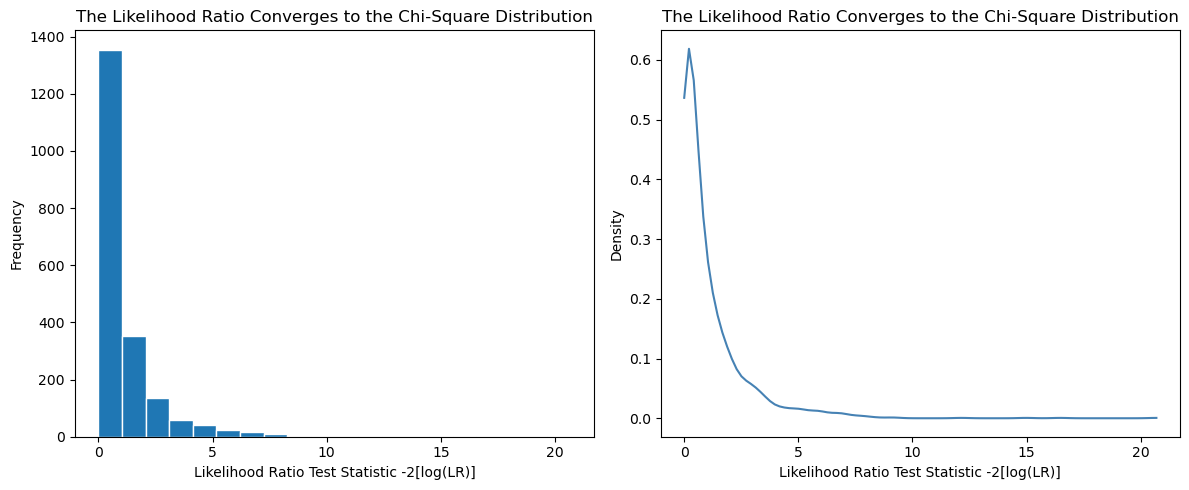

In [24]:
# Flip a coin 1000 times 2000 times
flips_per_experiment = 1000
n_experiments = 2000
prob_heads = 0.6

np.random.seed(0)
flips = [flipcoin(prob_heads, flips_per_experiment) for _ in range(n_experiments)]

LRTs, L1s, L2s = calc_LRTs(flips, 1, 2)
plot_LRTs(LRTs)

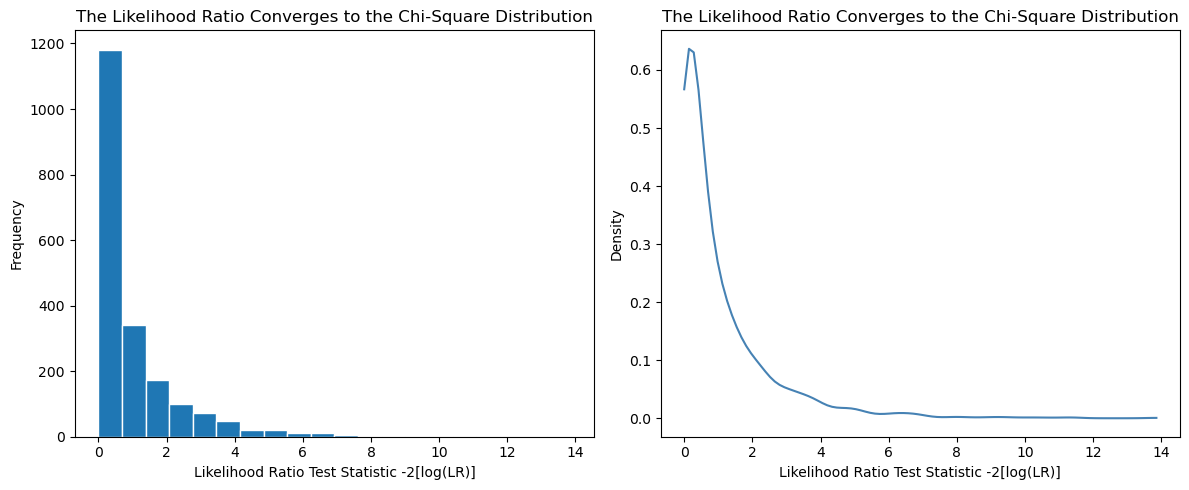

In [25]:
# Flip a coin 1000 times 2000 times
flips_per_experiment = 1000
n_experiments = 2000
prob_heads = 0.9

np.random.seed(0)
flips = [flipcoin(prob_heads, flips_per_experiment) for _ in range(n_experiments)]

LRTs, L1s, L2s = calc_LRTs(flips, 1, 2)
plot_LRTs(LRTs)

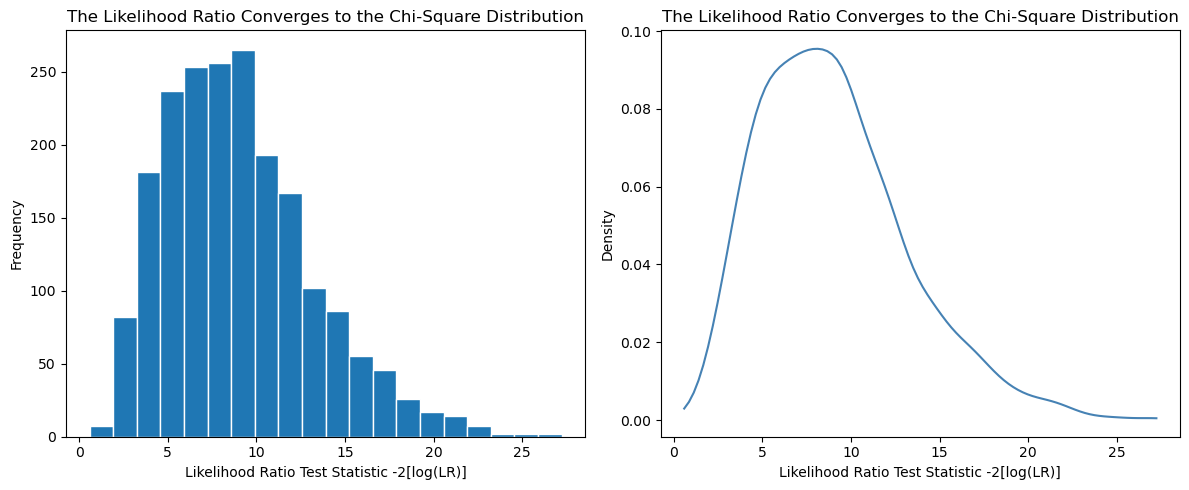

In [26]:
# Flip a coin 1000 times 2000 times
flips_per_experiment = 1000
n_experiments = 2000
prob_heads = 0.6

np.random.seed(0)
flips = [flipcoin(prob_heads, flips_per_experiment) for _ in range(n_experiments)]

LRTs, L1s, L2s = calc_LRTs(flips, 1, 10)
plot_LRTs(LRTs)

In [33]:
sample = [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
LRT, _, _ = calc_LRTs([sample], 1, 2)
LRT

[5.300218036681908]

In [34]:
# calcuate the p-value
from scipy.stats import chi2
p_value = 1 - chi2.cdf(LRT, 1)
p_value

array([0.02132276])

In [36]:
1 - chi2.cdf(9.6, 8)

0.29422991649656427

## Probing for small numbers

In [47]:
flips_per_experiment = 30
n_experiments = 5
prob_heads = 0.8

flips = [flipcoin(prob_heads, flips_per_experiment) for _ in range(n_experiments)]

In [48]:
flips

[array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1]),
 array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1]),
 array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1])]

In [49]:
calc_max_likelihood_params(flips[1], 2)

[0.6, 0.7333333333333333]

In [50]:
calc_log_likelihood(flips[1], [.9, .4])

-26.88625574456438

In [51]:
LRTs, L1s, L2s = calc_LRTs(flips, 1, 2)

In [53]:
L1s

[-17.397455142543023,
 -19.095425048844383,
 -16.298183440107024,
 -18.3259290616468,
 -15.01207270614563]

In [54]:
L2s

[-17.053748877495007,
 -18.79390257641036,
 -16.204763924344334,
 -18.246440095693707,
 -13.221662926341722]

In [55]:
LRTs

[0.687412530096033,
 0.6030449448680457,
 0.1868390315253805,
 0.15897793190618614,
 3.580819559607818]